In [48]:
import pandas as pd
import seaborn as sns
import numpy as np 

import matplotlib.pyplot as plt

import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_csv("iris_dataset.csv")

In [3]:
df.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.138728,3.470118,1.441015,1.094873,setosa
1,2,4.849873,3.034931,1.414931,0.968687,setosa
2,3,4.715843,3.239083,1.295309,1.006643,setosa
3,4,4.603747,NaN,1.480616,1.002344,setosa
4,5,4.988744,3.645049,1.417527,1.122947,setosa


# Q1

In [12]:
df.corr()

,id,sepal_length,sepal_width,petal_length,petal_width
id,1.000000,0.714119,-0.412590,0.882761,0.880322
sepal_length,0.714119,1.000000,-0.118515,0.870048,0.836449
sepal_width,-0.412590,-0.118515,1.000000,-0.438271,-0.247971
petal_length,0.882761,0.870048,-0.438271,1.000000,0.942274
petal_width,0.880322,0.836449,-0.247971,0.942274,1.000000


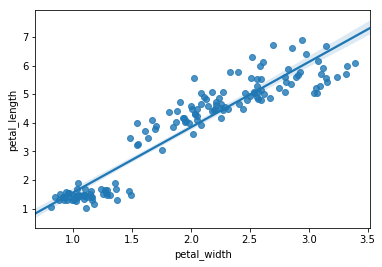

In [9]:
sns.regplot(df["petal_width"], df["petal_length"])
plt.show()

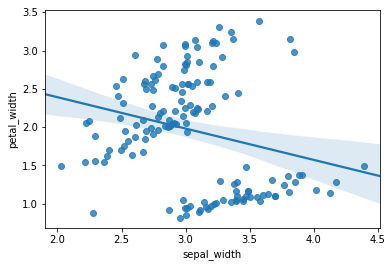

In [10]:
sns.regplot(df["sepal_width"], df["petal_width"])
plt.show()

# Q3

In [56]:
sub_df = df.dropna(axis=0).copy() #df[df["species"]=="dna"]

Y = sub_df["petal_width"]
X = sub_df[["petal_length"]]
X = X.copy()
X['intercept'] = 1.

model = sm.OLS(Y, X)
result = model.fit()
a,b = result.params['petal_length'], result.params['intercept']
print(result.params)

petal_length    0.385994
intercept       0.509268
dtype: float64


In [38]:
sub_df = df[df["species"]=="setosa"].dropna(axis=0).copy() #df[df["species"]=="dna"]

Y = sub_df["petal_width"]
X = sub_df[["sepal_width"]]
X = X.copy()
X['intercept'] = 1.

model = sm.OLS(Y, X)
result = model.fit()
a1,b1 = result.params['sepal_width'], result.params['intercept']
print(result.params)

sepal_width    0.317321
intercept      0.015082
dtype: float64


In [39]:
sub_df = df[df["species"]=="virginica"].dropna(axis=0).copy() #df[df["species"]=="dna"]

Y = sub_df["petal_width"]
X = sub_df[["sepal_width"]]
X = X.copy()
X['intercept'] = 1.

model = sm.OLS(Y, X)
result = model.fit()
a2,b2 = result.params['sepal_width'], result.params['intercept']
print(result.params)

sepal_width    0.671191
intercept      0.764758
dtype: float64


In [40]:
sub_df = df[df["species"]=="versicolor"].dropna(axis=0).copy() #df[df["species"]=="dna"]

Y = sub_df["petal_width"]
X = sub_df[["sepal_width"]]
X = X.copy()
X['intercept'] = 1.

model = sm.OLS(Y, X)
result = model.fit()
a3,b3 = result.params['sepal_width'], result.params['intercept']
print(result.params)

sepal_width    0.699191
intercept      0.076837
dtype: float64


In [45]:
df["petal_width"].tolist()

[1.0948729954150245,
 0.9686870070586728,
 1.0066430360745642,
 1.0023435676326218,
 1.1229468645998857,
 1.3707076193470564,
 1.1587096208456753,
 1.056730721850014,
 0.9202991801977132,
 0.8908311520769261,
 1.103205651040462,
 1.0997975949541066,
 0.8512151625143876,
 0.8148501169290558,
 1.180657125485668,
 1.4926706686280289,
 1.3732747450325646,
 1.1671607842398315,
 1.2383417021378258,
 1.2842586506085787,
 1.0335943421784837,
 1.31488180155177,
 1.1091616053059787,
 1.2903946552980512,
 1.0445514812598415,
 0.93945310240896,
 1.2770092131971194,
 1.0861277897754742,
 1.024196816163762,
 0.9673331514756508,
 0.9602580708244686,
 1.2599532762063888,
 1.145051532095728,
 1.2870014662460638,
 0.9225945656079846,
 1.0248604322271542,
 1.0922211746856856,
 1.0278552083780286,
 0.947576087476428,
 1.0310541646410123,
 1.1631226594707833,
 0.881947441490365,
 0.9975843213310982,
 1.4785151754206023,
 1.3563511604938507,
 1.041676575876687,
 1.1579111173712628,
 0.9242742810232946,
 1.1

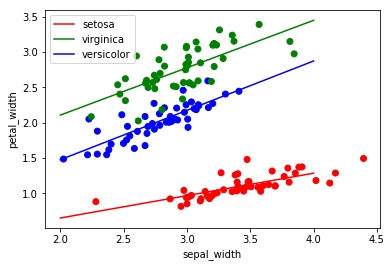

In [55]:
c_list = {"setosa" : "r", "virginica" : "g", "versicolor" : "b"}
color = [c_list[x] for x in df["species"].tolist()]
plt.scatter(df["sepal_width"].tolist(), df["petal_width"].tolist(), c=color)
plt.plot(np.arange(2, 5),[a1*x+b1 for x in np.arange(2, 5)], c="r", label="setosa")
plt.plot(np.arange(2, 5),[a2*x+b2 for x in np.arange(2, 5)], c="g", label="virginica")
plt.plot(np.arange(2, 5),[a3*x+b3 for x in np.arange(2, 5)], c="b", label="versicolor")
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.legend()
plt.savefig("Q3.png")
plt.show()

# Q4 

In [59]:
coeffs = {
    "cas 1" : {'a': a  , 'b':b },
    "cas 2" : {'a': a1 , 'b':b1},
    "cas 3" : {'a': a2 , 'b':b2},
    "cas 4" : {'a': a3 , 'b':b3},
}
lignes_modifiees = []

for (i, individu) in df.iterrows(): # pour chaque individu de iris,...
    if pd.isnull(individu["petal_width"]): #... on test si individu["petal_width"] est nul.
        a = coeffs["cas 1"]['a']
        b = coeffs["cas 1"]['b']
        X = individu["petal_length"]
        Y = a*X + b
        df.loc[i,"petal_width"] = Y # on remplace la valeur manquante par Y
        lignes_modifiees.append(i)
        print("On a complété petal_width par {} a partir de petal_length={}".format(Y,X))
        
    if pd.isnull(individu["sepal_width"]):
        espece = individu["species"]
        X = individu["petal_width"]
        if espece == "setosa":
            cas = "cas 2"
        elif espece == "virginica":
            cas = "cas 3"
        elif espece == "versicolor":
            cas = "cas 4"
        a = coeffs[cas]['a']
        b = coeffs[cas]['b']
        Y = a*X + b
        df.loc[i,"petal_width"] = Y # on remplace la valeur manquante par Y
        lignes_modifiees.append(i)
        lignes_modifiees.append(i)
        print("On a complété sepal_width par {} a partir de l'espece:{} et de petal_width={}".format(Y,espece,X))

On a complété sepal_width par 0.3331473509555348 a partir de l'espece:setosa et de petal_width=1.0023435676326218
On a complété petal_width par 1.293201118502893 a partir de petal_length=4.027837977207209
On a complété sepal_width par 1.6569771393101191 a partir de l'espece:versicolor et de petal_width=2.259954321281721
On a complété sepal_width par 2.99437043589523 a partir de l'espece:virginica et de petal_width=3.3218723995908728
